In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [3]:
df = pd.read_csv('vehicles.csv')

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            435849 non-null  int64  
 1   url           435849 non-null  object 
 2   region        435849 non-null  object 
 3   region_url    435849 non-null  object 
 4   price         435849 non-null  int64  
 5   year          434732 non-null  float64
 6   manufacturer  415102 non-null  object 
 7   model         429650 non-null  object 
 8   condition     249043 non-null  object 
 9   cylinders     269465 non-null  object 
 10  fuel          432858 non-null  object 
 11  odometer      360701 non-null  float64
 12  title_status  434043 non-null  object 
 13  transmission  433703 non-null  object 
 14  vin           239197 non-null  object 
 15  drive         313838 non-null  object 
 16  size          139888 non-null  object 
 17  type          318741 non-null  object 
 18  pain

In [6]:
drop_columns = ['url', 'region', 'region_url', 'model', 'title_status', 'id', 'size', 'image_url', 'description', 'lat','long', 'county', 'state']
df = df.drop(columns = drop_columns)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         435849 non-null  int64  
 1   year          434732 non-null  float64
 2   manufacturer  415102 non-null  object 
 3   condition     249043 non-null  object 
 4   cylinders     269465 non-null  object 
 5   fuel          432858 non-null  object 
 6   odometer      360701 non-null  float64
 7   transmission  433703 non-null  object 
 8   vin           239197 non-null  object 
 9   drive         313838 non-null  object 
 10  type          318741 non-null  object 
 11  paint_color   300602 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.9+ MB


In [10]:
df = df.drop(columns='vin')

KeyError: "['vin'] not found in axis"

In [11]:
df = df.dropna()
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
3,9000,2004.0,chevrolet,excellent,5 cylinders,gas,54000.0,automatic,rwd,pickup,red
7,8500,2005.0,ford,excellent,6 cylinders,gas,62800.0,automatic,rwd,convertible,silver
12,2750,2006.0,chevrolet,good,8 cylinders,gas,165000.0,automatic,4wd,truck,white
19,24930,2017.0,subaru,excellent,4 cylinders,gas,32989.0,automatic,4wd,SUV,grey
26,3200,1998.0,volkswagen,good,4 cylinders,gas,98186.0,manual,rwd,coupe,blue


In [12]:
df['paint_color'].value_counts()

white     30701
black     23575
silver    18932
grey      14957
blue      12713
red       12433
green      3615
brown      3237
custom     2772
yellow      857
orange      628
purple      373
Name: paint_color, dtype: int64

In [13]:
df.dtypes

price             int64
year            float64
manufacturer     object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
type             object
paint_color      object
dtype: object

In [14]:
df['year'] = (2020-df['year']).astype(int)


In [15]:
df['odometer'] = df['odometer'].astype(int)

In [16]:
c_dum = ['manufacturer', 'condition', 'cylinders', 'fuel', 'drive', 'type', 'paint_color', 'transmission']
df_cleaned = pd.get_dummies(df, columns=c_dum, drop_first=True)

In [17]:
df_cleaned

,price,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,transmission_manual,transmission_other
3,9000,16,54000,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7,8500,15,62800,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12,2750,14,165000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
19,24930,3,32989,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
26,3200,22,98186,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435839,29930,4,30383,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435840,24900,3,27100,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
435841,9995,12,145975,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
435843,46995,1,55000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
df_cleaned['price']=df_cleaned['price'].replace(0,df_cleaned['price'].median())

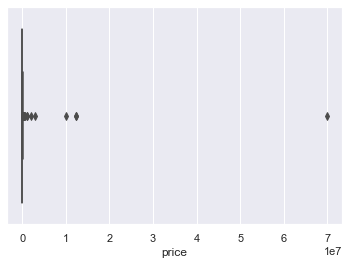

In [19]:
sns.boxplot(df_cleaned['price'])

In [20]:
rr=sorted(df["price"])

In [21]:
quantile1, quantile3= np.percentile(rr,[10,90])

In [22]:
print(quantile1,quantile3)

2600.0 24999.0


In [23]:
df_cleaned=df_cleaned[(df_cleaned.price < 24999) & (df_cleaned.price >= 2600)]
df_cleaned.shape

(104462, 87)

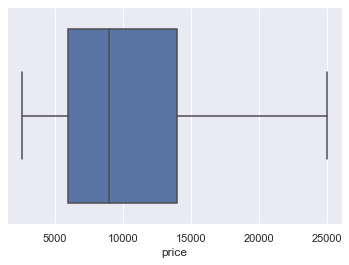

In [24]:
sns.boxplot(df_cleaned['price'])

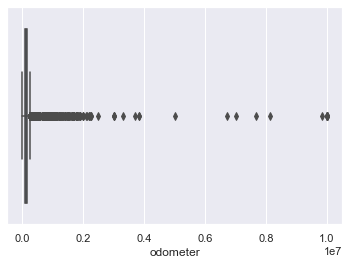

In [25]:
sns.boxplot(df_cleaned['odometer'])

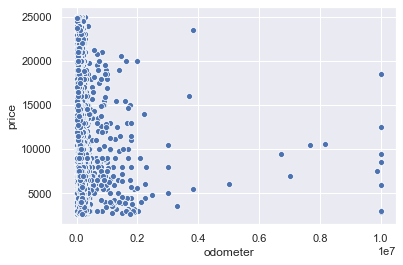

In [26]:
sns.scatterplot(x="odometer", y="price", data=df_cleaned)

In [27]:
df['odometer'].max()

10000000

In [28]:
df['odometer'].min()

0

In [29]:
df_cleaned=df_cleaned[(df_cleaned.odometer < 260000) & (df_cleaned.odometer > 0)]
df_cleaned.shape

(102432, 87)

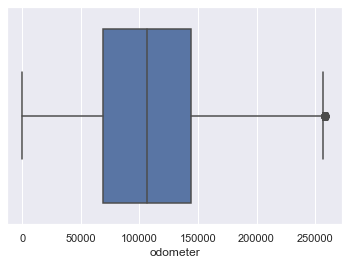

In [30]:
sns.boxplot(df_cleaned['odometer'])

In [31]:
df['year'].max()

120

In [32]:
df['year'].min()

-1

In [33]:
df_cleaned=df_cleaned[(df_cleaned.year < 24) & (df_cleaned.odometer >= 0)]
df_cleaned.shape

(98950, 87)

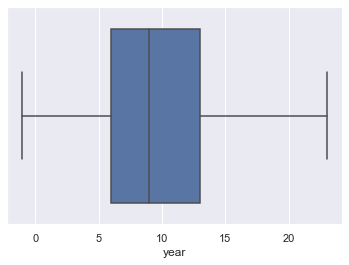

In [34]:
sns.boxplot(df_cleaned['year'])

In [35]:
df[['price', 'year', 'odometer']].corr()

,price,year,odometer
price,1.000000,-0.016392,-0.010491
year,-0.016392,1.000000,0.196729
odometer,-0.010491,0.196729,1.000000


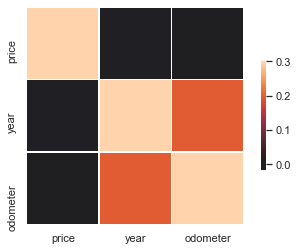

In [36]:
sns.heatmap(df[['price', 'year', 'odometer']].corr(), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'drive', 'type', 'paint_color'],
      dtype='object')

In [38]:
df.groupby(by=["cylinders"])['price'].mean()

cylinders
10 cylinders    13487.316136
12 cylinders    29986.446809
3 cylinders      9048.748387
4 cylinders     10715.555567
5 cylinders      6531.007660
6 cylinders     11940.053483
8 cylinders     16586.060927
other           16318.281588
Name: price, dtype: float64

In [39]:
df.groupby(by=["drive"])['price'].mean()

drive
4wd    15618.741739
fwd     9579.897211
rwd    12843.667984
Name: price, dtype: float64

In [40]:
df.groupby(by=["transmission"])['price'].mean()

transmission
automatic    12724.913177
manual       10910.340628
other        22109.409610
Name: price, dtype: float64

In [41]:
df_cleaned.to_csv('carpreed_preprocessed.csv', index=False)